# Qubic - Finite - Medio BDP



In [3]:
from IPython.display import JSON
# JSON({
#     "NumLinks": 1,
#     "Links": [
#         {
#             "Link-type": "LMS",
#             "Band": "Ka_truqi_5sec",
#             "DataRate": 60,
#             "Delay": 10,
#             "ErrorRate": 0,
#             "Mode": "OTROS",
#             "MTU": 1460,
#             "DropTailQueue": 90000,
#             "Background": false
#         }
#     ]
# })

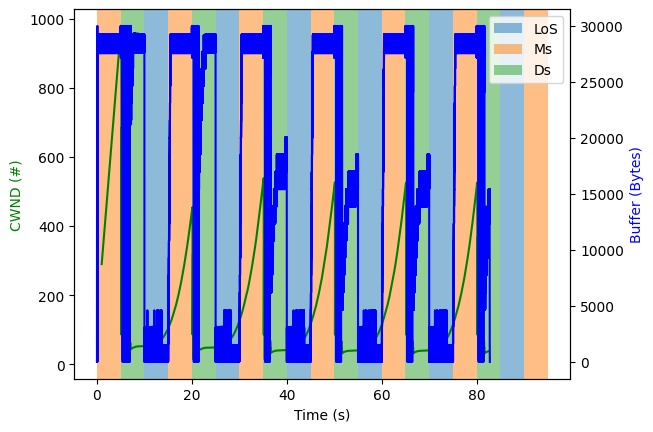

In [4]:
from ast import Del
from fileinput import filename
import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch




def plot_state_as_color(x_data, state_data, axis, add_labels=True):
    state_current = state_data[0]
    span_left = x_data[0]
    state_encountered = []
    for span_right, state_next in zip(x_data, state_data):
        if state_current != state_next:
            label = None
            if state_current not in state_encountered:
                state_encountered.append(state_current)
                if add_labels:
                    label = state_current

            # plot section
            color = "C{}".format(state_encountered.index(state_current))
            axis.axvspan(span_left, span_right, facecolor=color, alpha=0.5, label=label)

            # Update current state parameters
            span_left = span_right
            state_current = state_next

foldername= "./Cubic_finito/logCwnd.log"

with open (foldername) as datatoread:
     cwnd = np.loadtxt(datatoread)

foldername= "./Cubic_finito/logBuffer.log"
with open (foldername) as datatoread:
     buff = np.loadtxt(datatoread)

foldername= "./Cubic_finito/ChannelVar.log"
with open (foldername) as datatoread:
     CahnnelVar = np.loadtxt(datatoread)


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.plot(buff[:,0], buff[:,1], 'b')
ax1.plot(cwnd[:,0], cwnd[:,1], 'g-')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('CWND (#)', color='g')
ax2.set_ylabel('Buffer (Bytes)', color='b')


# cmap = matplotlib.cm.get_cmap('Set3')

# for c in CahnnelVar[:,1].unique():
#     bounds = CahnnelVar[:,[0,1]].groupby('color').agg(['min', 'max']).loc[c]
#     ax1.axvspan(bounds.min(), bounds.max()+1, alpha=0.3, color=cmap.colors[c])
# legend = [Patch(facecolor=cmap.colors[c], label=c) for c in df['color'].unique()]
# ax1.legend(handles=legend)
state_display_name = { 1: "LoS",
                      2: "Ms",
                      3: "Ds"}
state = [state_display_name[s] for s in CahnnelVar[:,1]]
plot_state_as_color(x_data=CahnnelVar[:,0], state_data=state, axis=ax1)
ax1.legend()

plt.show()

# Delay - Cubic - Buff finito 1 BDP

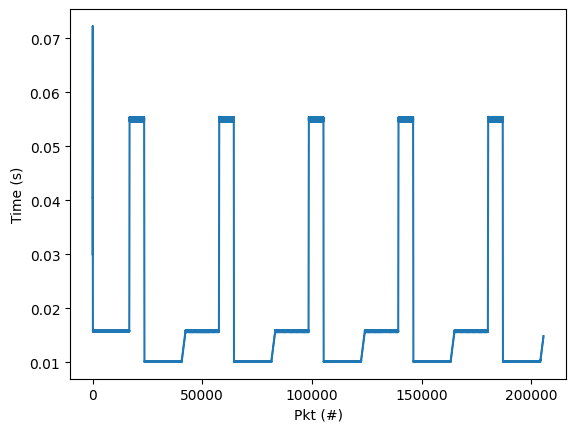

In [5]:

foldername = "./Cubic_finito_1BDP/TxFile.log"
with open (foldername) as datatoread:
     Tx = np.loadtxt(datatoread)

foldername = "./Cubic_finito_1BDP/RxFile.log"
with open (foldername) as datatoread:
     Rx = np.loadtxt(datatoread)

delay = Rx[:,2] - Tx[0:len(Rx[:,1]),2]


fig, ax1 = plt.subplots()
ax1.set_xlabel('Pkt (#)')
ax1.set_ylabel('Time (s)')
ax1.plot(delay)
plt.show()

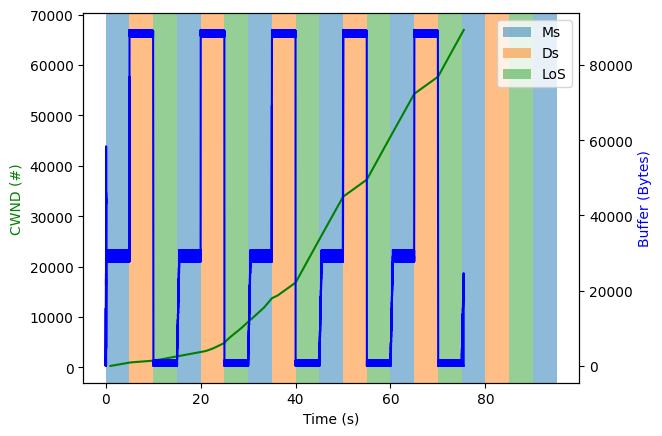

In [6]:
foldername= "./Cubic_finito_1BDP/ChannelVar.log"
with open (foldername) as datatoread:
     CahnnelVar = np.loadtxt(datatoread)


foldername= "./Cubic_finito_1BDP/logCwnd.log"

with open (foldername) as datatoread:
     cwnd = np.loadtxt(datatoread)

foldername= "./Cubic_finito_1BDP/logBuffer.log"
with open (foldername) as datatoread:
     buff = np.loadtxt(datatoread)



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.plot(buff[:,0], buff[:,1], 'b')
ax1.plot(cwnd[:,0], cwnd[:,1], 'g-')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('CWND (#)', color='g')
ax2.set_ylabel('Buffer (Bytes)', color='b')


state_display_name = { 1: "LoS",
                      2: "Ms",
                      3: "Ds"}
state = [state_display_name[s] for s in CahnnelVar[:,1]]
plot_state_as_color(x_data=CahnnelVar[:,0], state_data=state, axis=ax1)
ax1.legend()

plt.show()


# New Reno - Finite - Medio BDP

there is packet loss, therefore, matching RX pkt with TX is complicated (ID) unless considering the fist time the packet was sent 

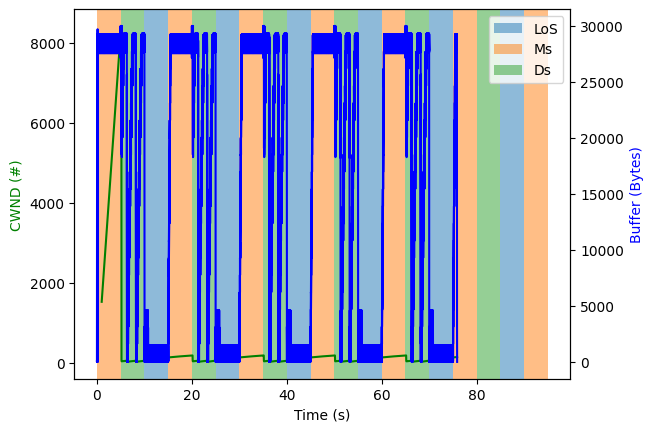

In [7]:
foldername= "./Reno_finito_MedioBDP/logCwnd.log"

with open (foldername) as datatoread:
     cwnd = np.loadtxt(datatoread)

foldername= "./Reno_finito_MedioBDP/logBuffer.log"
with open (foldername) as datatoread:
     buff = np.loadtxt(datatoread)


foldername= "./Reno_finito_MedioBDP/ChannelVar.log"
with open (foldername) as datatoread:
     CahnnelVar = np.loadtxt(datatoread)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(cwnd[:,0], cwnd[:,1], 'g-')
ax2.plot(buff[:,0], buff[:,1], 'b-')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('CWND (#)', color='g')
ax2.set_ylabel('Buffer (Bytes)', color='b')

state_display_name = { 1: "LoS",
                      2: "Ms",
                      3: "Ds"}
state = [state_display_name[s] for s in CahnnelVar[:,1]]
plot_state_as_color(x_data=CahnnelVar[:,0], state_data=state, axis=ax1)
ax1.legend()

plt.show()

# Delay - New Reno - Buff finito 1 BDP

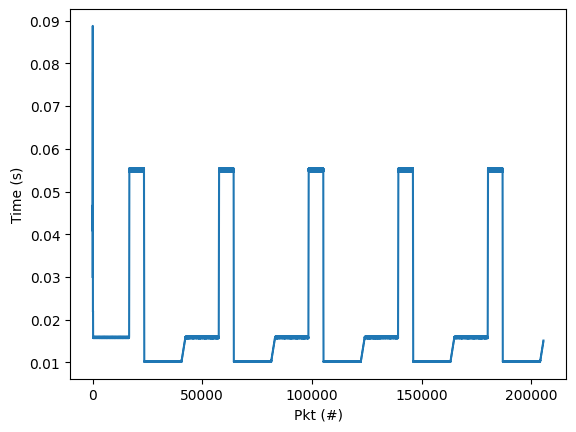

In [8]:
foldername = "./Reno_finito_1BDP/TxFile.log"
with open (foldername) as datatoread:
     Tx = np.loadtxt(datatoread)

foldername = "./Reno_finito_1BDP/RxFile.log"
with open (foldername) as datatoread:
     Rx = np.loadtxt(datatoread)

delay = Rx[:,2] - Tx[0:len(Rx[:,1]),2]


fig, ax1 = plt.subplots()
ax1.set_xlabel('Pkt (#)')
ax1.set_ylabel('Time (s)')
ax1.plot(delay)
plt.show()

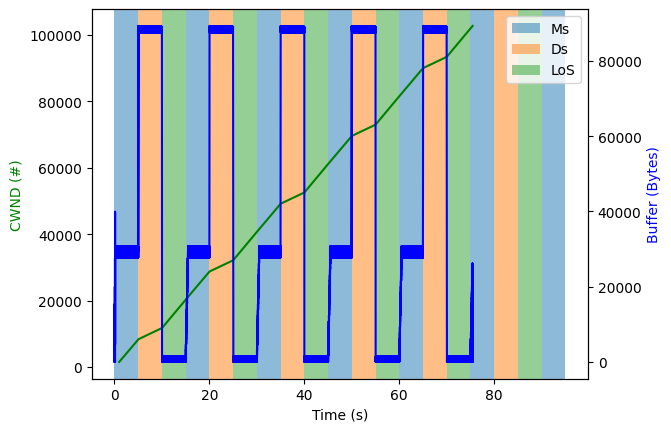

In [9]:
foldername= "./Reno_finito_1BDP/ChannelVar.log"
with open (foldername) as datatoread:
     CahnnelVar = np.loadtxt(datatoread)


foldername= "./Reno_finito_1BDP/logCwnd.log"

with open (foldername) as datatoread:
     cwnd = np.loadtxt(datatoread)

foldername= "./Reno_finito_1BDP/logBuffer.log"
with open (foldername) as datatoread:
     buff = np.loadtxt(datatoread)



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.plot(buff[:,0], buff[:,1], 'b')
ax1.plot(cwnd[:,0], cwnd[:,1], 'g-')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('CWND (#)', color='g')
ax2.set_ylabel('Buffer (Bytes)', color='b')


state_display_name = { 1: "LoS",
                      2: "Ms",
                      3: "Ds"}
state = [state_display_name[s] for s in CahnnelVar[:,1]]
plot_state_as_color(x_data=CahnnelVar[:,0], state_data=state, axis=ax1)
ax1.legend()

plt.show()


# LMS - Ideal Channel + Back Ground Traffic - LMS


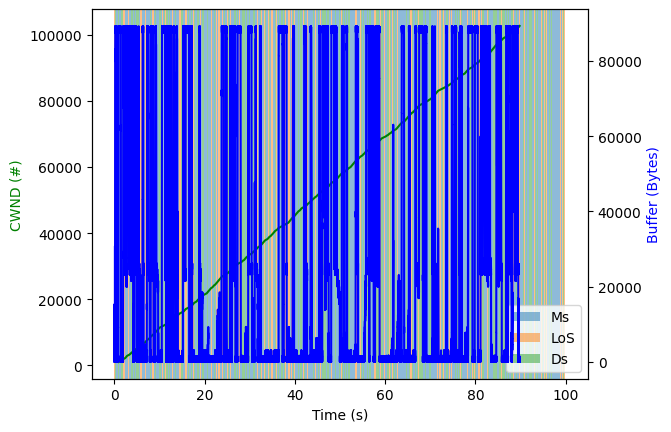

In [10]:
import numpy as np
foldername= "./Reno_finito_1BDPConfigScenario_10/logCwnd.log"

with open (foldername) as datatoread:
     cwnd = np.loadtxt(datatoread)

foldername= "./Reno_finito_1BDPConfigScenario_10/logBuffer.log"
with open (foldername) as datatoread:
     buff = np.loadtxt(datatoread)


foldername= "./Reno_finito_1BDPConfigScenario_10/ChannelVar.log"
with open (foldername) as datatoread:
     CahnnelVar = np.loadtxt(datatoread)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(cwnd[:,0], cwnd[:,1], 'g-')
ax2.plot(buff[:,0], buff[:,1], 'b-')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('CWND (#)', color='g')
ax2.set_ylabel('Buffer (Bytes)', color='b')

state_display_name = { 1: "LoS",
                      2: "Ms",
                      3: "Ds"}
state = [state_display_name[s] for s in CahnnelVar[:,1]]
plot_state_as_color(x_data=CahnnelVar[:,0], state_data=state, axis=ax1)
ax1.legend()

plt.show()

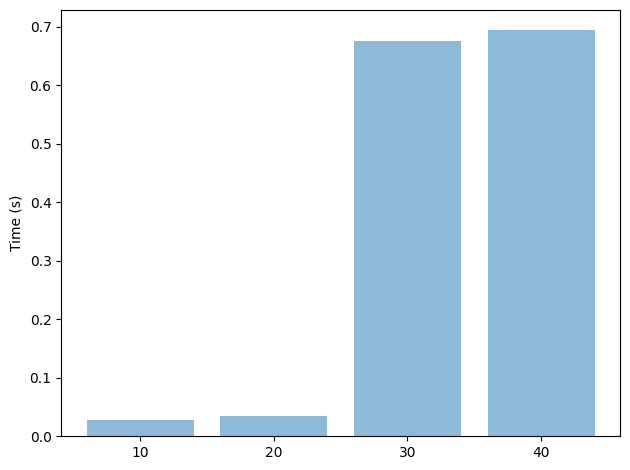

In [11]:
import numpy as np
Config_rates = np.arange(10,50,10)
plt.rcParams["figure.autolayout"] = True
delay = []
fig = plt.figure()
for conf in Config_rates:
     
    foldername = "./Reno_finito_1BDPConfigScenario_{}/TxFile.log".format(conf)
    with open (foldername) as datatoread:
        Tx = np.loadtxt(datatoread)

    foldername = "./Reno_finito_1BDPConfigScenario_{}/RxFile.log".format(conf)
    with open (foldername) as datatoread:
        Rx = np.loadtxt(datatoread)

    delay.append( np.sum(Rx[:,2] - Tx[0:len(Rx[:,1]),2])/len(Rx))



plt.ylabel('Time (s)')
plt.bar(np.arange(len(Config_rates)),delay, align="center", alpha=0.5)
plt.xticks(np.arange(len(Config_rates)),Config_rates)
plt.show()

In [12]:
# Config_rates = [10, 20 ,30]
# plt.rcParams["figure.autolayout"] = True
# Nsim = 100
# delay = []
# delay_conf = []
# fig = plt.figure()
# for conf in Config_rates:
#      for sim in range(1,Nsim+1,1):
#           foldername = "./Reno_finito_1BDPConfigScenario_{}/{}/TxFile.log".format(conf,sim)
#           with open (foldername) as datatoread:
#                Tx = np.loadtxt(datatoread)

#           foldername = "./Reno_finito_1BDPConfigScenario_{}/{}/RxFile.log".format(conf,sim)
#           with open (foldername) as datatoread:
#                Rx = np.loadtxt(datatoread)

#           delay.append( np.sum(Rx[:,2] - Tx[0:len(Rx[:,1]),2])/len(Rx))
#      delay_conf.append(np.mean(delay))


# plt.ylabel('Time (s)')
# plt.bar(np.arange(len(Config_rates)),delay, align="center", alpha=0.5)
# plt.xticks(np.arange(len(Config_rates)),Config_rates)
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './Reno_finito_1BDPConfigScenario_10/1/TxFile.log'

<Figure size 640x480 with 0 Axes>